In [36]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Tải dữ liệu

In [37]:
from tabulate import tabulate

symbol = 'AMZN'
start_date = '2022-01-01'
end_date = '2022-12-31'

stock = yf.Ticker(symbol)
data = stock.history(start=start_date, end=end_date)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} from {start_date} to {end_date}")

formatted_data = pd.concat([data.head(), data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))

print("\nShowing only the first and last 5 rows of data:")
print(tabulate(formatted_data, headers='keys', tablefmt='grid'))

Historical Data for AMZN from 2022-01-01 to 2022-12-31
+---------------------------+---------+---------+---------+---------+-------------+-------------+----------------+
| Date                      |    Open |    High |     Low |   Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+---------+---------+---------+---------+-------------+-------------+----------------|
| 2022-01-03 00:00:00-05:00 | 167.55  | 170.704 | 166.161 | 170.404 | 6.352e+07   |           0 |              0 |
| 2022-01-04 00:00:00-05:00 | 170.438 | 171.4   | 166.35  | 167.522 | 7.0726e+07  |           0 |              0 |
| 2022-01-05 00:00:00-05:00 | 166.883 | 167.126 | 164.357 | 164.357 | 6.4302e+07  |           0 |              0 |
| 2022-01-06 00:00:00-05:00 | 163.451 | 164.8   | 161.937 | 163.254 | 5.1958e+07  |           0 |              0 |
| 2022-01-07 00:00:00-05:00 | 163.839 | 165.243 | 162.031 | 162.554 | 4.6606e+07  |           0 |              0 |
| 2022-12-23 00:00:00-05:

Đây là phần code dùng để lấy dữ liệu lịch sử từ cổ phiếu và hiển thị ra rõ ràng.
Ở đây sẽ lấy dữ liệu từ cổ phiếu amazon 
data = stock.history(start=start_date, end=end_date) lấy dữ liệu trong khoảng thời gian mình đã chọn.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
Hiển thị toàn bộ bảng dữ liệu.
Tiếp theo sẽ lấy 5 dòng đầu và cuối.

Xử lí dữ liệu

In [38]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']].values)

def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data)

Đây là phần xử lí dữ liệu trước khi đưa vô mô hình LSTM và CNN.
Chuẩn hóa dữ liệu về dạng [0,1] của cột Close
Tạo chuỗi dữ liệu để biến dữ liệu dạng chuỗi thời gian thành các mẫu huấn luyện (X, y).
X là 30 ngày liên tiếp
Y là giá ngày 31 là  mục tiêu dự đoán

Tách thành tập train và test

In [39]:
# Tách train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train.shape, X_test.shape

((176, 30, 1), (45, 30, 1))

Đây là phần tách dữ liệu huấn luyện và kiểm thử,
Len(x) ở đây là dữ liệu trong 30 ngày, với 80% huấn luyện, 20% kiểm thử.

LSTM

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


c:\Users\2T Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - loss: 0.1593 - val_loss: 0.0274
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0436 - val_loss: 0.0344
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0191 - val_loss: 0.0099
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0248 - val_loss: 0.0139
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0150 - val_loss: 0.0267
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0150 - val_loss: 0.0266
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0129 - val_loss: 0.0184
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0123 - val_loss: 0.0168
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0121 - val_loss: 0.0195
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0113 - val_loss: 0.0165
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111 - val_loss: 0.0152
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0109 - val_loss: 0.0138
Epoch 13/20

Đây là phần xây dựng và huấn luyện mô hình LSTM

CNN

In [41]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


c:\Users\2T Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0997
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0367 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0309 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0204  
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0185 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0165
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144  
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0125
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0095 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091  
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0084 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0078 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075 
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1

Đây là phần xây dựng và huấn luyện mô hình CNN


Đánh giá và so sánh LSTM và CNN

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Dự đoán bằng 2 mô hình
y_pred_lstm = model.predict(X_test)
y_pred_cnn = cnn_model.predict(X_test)

# Đưa các giá trị về lại giá trị gốc (USD)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)
y_pred_cnn_rescaled = scaler.inverse_transform(y_pred_cnn)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính chỉ số
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

evaluate_model(y_test_rescaled, y_pred_lstm_rescaled, "LSTM")
evaluate_model(y_test_rescaled, y_pred_cnn_rescaled, "CNN")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:5 out of the last 35 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000024A0A39A2A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
LSTM - MSE: 97.1317, MAE: 8.3229, MAPE: 9.18%
CNN - MSE: 77.0161, MAE: 7.3192, MAPE: 8.05%


Sau khi huấn luyện và đánh giá hai mô hình LSTM và CNN, kết quả cho thấy mô hình CNN có độ chính xác cao hơn. Cụ thể, CNN đạt MAPE = 8.05 %, thấp hơn so với LSTM MAPE = 9.18 %. Điều này cho thấy rằng mô hình CNN có khả năng dự báo giá tốt hơn, với sai số trung bình chỉ khoảng 8 % so với giá trị thực tế

Hàm dự đoán

In [43]:
def forecast_multi_step(model, last_sequence, n_steps):
    seq = last_sequence.copy()
    preds = []
    for _ in range(n_steps):
        pred = model.predict(seq.reshape(1, seq_length, 1))[0,0]
        preds.append(pred)
        seq = np.append(seq[1:], pred)
    return preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

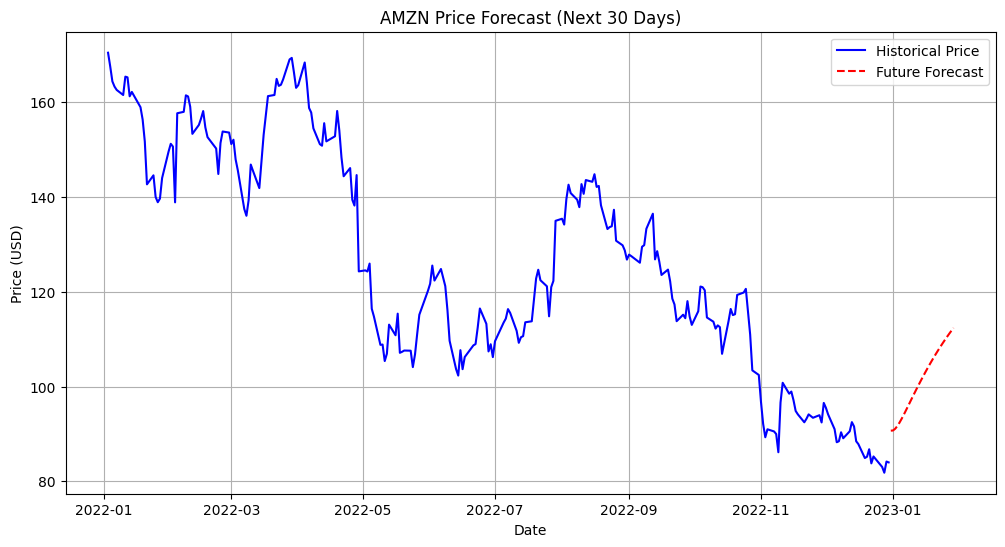

In [ ]:
# Tạo chuỗi
last_sequence = scaled_data[-seq_length:]

# Dự đoán tương lai
future_preds = forecast_multi_step(model, last_sequence, n_steps=30)

# Chuyển giá trị dự đoán về giá gốc (USD)
future_preds_rescaled = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Tạo mốc thời gian cho phần dự báo
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(future_preds_rescaled), freq='D')

# Vẽ biểu đồ kết quả
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Historical Price', color='blue')
plt.plot(future_dates, future_preds_rescaled, label='Future Forecast', color='red', linestyle='--')
plt.title(f'{symbol} Price Forecast (Next {len(future_preds_rescaled)} Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Đây là phần trực quan hóa kết quả dự báo tương lai và đường nét đứt màu đỏ cho thấy dự đoán 30 ngày tiếp theo sẽ tăng lên. (-seq_length:) để dự đoán được tương lai mình phải lấy quá khứ gần nhất nên dấu âm ở đây mục đích là lấy ở cuối bảng, còn dấu hai chấm là để cắt một phần dữ liệu cuối bảng. Lúc mình huấn luyện mô hình dữ liệu ban đầu đã được chuẩn hóa nên phải chuyển ngược lại đưa về giá trị thực tế để dự đoán. 

LOG DIAGRAM

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0093 - val_loss: 0.0032
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0089 - val_loss: 0.0037
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0097 - val_loss: 0.0031
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0104 - val_loss: 0.0037
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0104 - val_loss: 0.0044
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0100 - val_loss: 0.0030
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0086 - val_loss: 0.0055
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0098 - val_loss: 0.0033
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0086 - val_loss: 0.0032
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0073 - val_loss: 0.0032
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0079 - val_loss: 0.0037
E

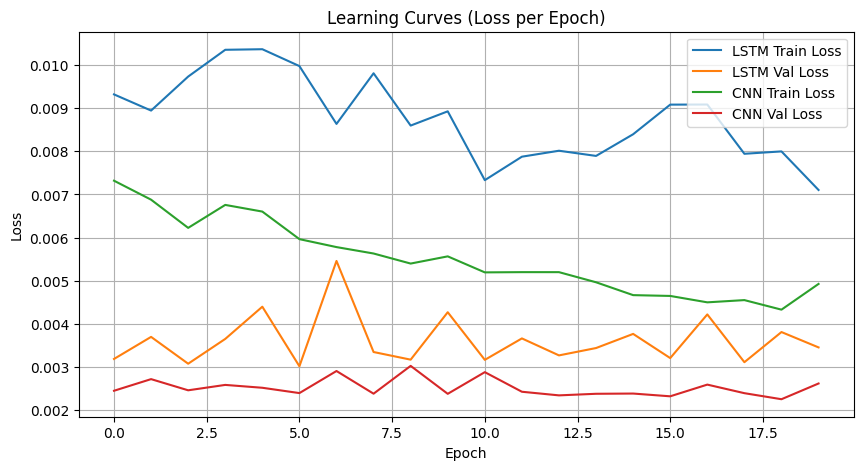

In [35]:
import matplotlib.pyplot as plt

# Lịch sử huấn luyện
history_lstm = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
history_cnn = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Vẽ log diagram (loss)
plt.figure(figsize=(10,5))
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.title('Learning Curves (Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Đây là phần được dùng để theo dõi và so sánh hiệu suất huấn luyện của hai mô hình theo từng epoch.
Đường LSTM Train Loss dao động mạnh, cho thấy mô hình học không ổn định
Đường LSTM Val Loss cũng dao động theo, không giảm đều, thể hiện rằng mô hình chưa hội tụ tốt
Đường CNN Train Loss giảm đều đặn qua các epoch, thể hiện quá trình học ổn định và liên tục cải thiện.
Đường CNN Val Loss duy trì rất thấp và ổn định, tổng quát hóa tốt hơn LSTM.
